In [71]:
# Units of variables given in the dataset:
#    elevation: meters above sea level
#    g: mm water equivalent per meter (db/dz)
#    continentality: degrees Celsius
#    cloud cover: percentage
#    summer temperature: degrees Celsius
#    precipitation: mm per year
#    average winter precipitation: mm per month 

# NOTE: climate variables are given from climatological gridded data (CRU) provided for the whole globe on ca 50x50 km grid
#
# Variables:
#                       g: [1x136 double]  glacier mass balance gradient (as an average over the observed period)
#        median_elevation: [1x136 double]  Median glacier elevation (derived from glacier hypsometry: glacier area vs elevation)
#      summer_temperature: [1x136 double]  Summer near-surface air temperature over a grid cell (ca 50x50 km) covering the glacier (averaged over the observed period)
#           precipitation: [1x136 double]  Total annaul precipitation over a grid cell (ca 50x50 km) covering the glacier (averaged over the observed period)
#                     lat: [1x136 double]  Geographical latitude of the glacier (in degrees)
#           max_elevation: [1x136 double]  Maximum glacier elevation
#                 WGMS ID: [1x136 int64]   Given glacier ID (from World Glacier Monitoring Service)
#    winter_precipitation: [1x136 double]  Same as for precipation but derived only over winter months 
#                     lon: [1x136 double]  Geographical longitude of the glacier (in degrees)
#             cloud_cover: [1x136 double]  Annual cloud cover over a grid cell (ca 50x50 km) covering the glacier (averaged over the observed period)
#          continentality: [1x136 double]  Maximum monthly temperature minus minimum monthly temperature over a year (over a grid cell covering the glacier and averaged over the observed period). The larger the continentality index the climate is more continental (rather than maritime). 


In [1]:
#import all required libraries etc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ipywidgets

#NOTE: to get ipywidgets to work, need to enter the following into the command line:
#    conda install -c conda-forge ipywidgets
#    conda install -c conda-forge nodejs
#    jupyter lab --version
#Based on the version of jupyter lab, check https://npm.taobao.org/package/@jupyter-widgets/jupyterlab-manager for next command
#The final command should look something like:
#    jupyter labextension install @jupyter-widgets/jupyterlab-manager@1.0
#where the -manager@XX changes based on the version of jupyter that you have

In [2]:
#load the data and check it out

data = pd.read_csv('glaciers.csv')
data.head()

,g,median_elevation,summer_temperature,precipitation,lat,max_elevation,winter_precipitation,lon,cloud_cover,continentality
0,8.102728,1071.00,7.626667,483.990,-54.78,1172.5,36.273333,-68.40,63.393750,8.395
1,1.860170,2660.00,11.663333,1637.810,47.04,2950.0,91.578333,12.97,61.731667,18.830
2,9.194071,2560.00,14.881667,1521.845,47.48,2910.0,83.785000,13.62,61.529583,20.045
3,4.162200,3039.75,11.683333,1550.760,46.80,3715.5,93.790000,10.77,62.957083,18.725
4,4.411077,2795.00,10.561667,1726.480,46.85,3140.0,110.065000,10.15,64.265417,17.855


In [3]:
#clean data -- g<0 is non physical and this data point should be removed

data = data.drop(np.argwhere(data['g']<0)[0])

/Users/samanderson/anaconda3/envs/eosc_410/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [4]:
#normalize data and check it out

data_norm = (data - data.mean())/data.std()
data_norm.head()

,g,median_elevation,summer_temperature,precipitation,lat,max_elevation,winter_precipitation,lon,cloud_cover,continentality
0,0.729295,-1.127617,-0.610002,-1.008986,-4.510634,-1.305564,-0.826765,-0.917411,-0.073330,-1.567918
1,-1.252792,0.077903,0.303656,0.634920,-0.009790,0.000761,0.080425,0.221562,-0.285946,-0.270948
2,1.075809,0.002036,1.032093,0.469699,0.009659,-0.028636,-0.047412,0.230660,-0.311797,-0.119936
3,-0.521870,0.366006,0.308183,0.510896,-0.020399,0.563344,0.116703,0.190768,-0.129189,-0.283999
4,-0.442849,0.180323,0.054305,0.761253,-0.018189,0.140396,0.383669,0.182089,0.038174,-0.392131


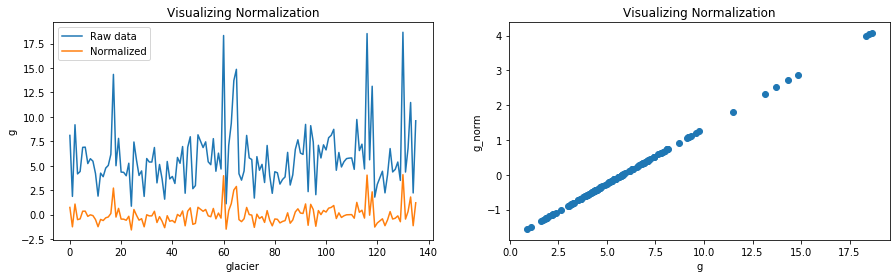

In [5]:
#visualize normalization

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.plot(data['g'])
plt.plot(data_norm['g'])
plt.legend(['Raw data','Normalized'])
plt.ylabel('g')
plt.xlabel('glacier')
plt.title('Visualizing Normalization')

plt.subplot(1,2,2)
plt.scatter(data['g'],data_norm['g'])
plt.ylabel('g_norm')
plt.xlabel('g')
plt.title('Visualizing Normalization')

plt.show()

In [6]:
#unpack normalized data
lat = data_norm['lat']
lon = data_norm['lon']
hmax = data_norm['max_elevation']
hmed = data_norm['median_elevation']
g = data_norm['g']
Pannual = data_norm['precipitation']
Pwinter = data_norm['winter_precipitation']
CI = data_norm['continentality']
cloud = data_norm['cloud_cover']
Tsummer = data_norm['summer_temperature']

SOLUTIONS